# EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# reading data set

In [3]:
loan=pd.read_csv(r"D:\Downloads\Loan payments data.csv")
loan.head(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,college,male


# checking the data shape

In [8]:
loan.shape

(500, 11)

# check the info and describe

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [13]:
loan.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


## Data preprocessing

In [16]:
loandict=pd.DataFrame(loan.dtypes)

In [18]:
# Identify
loandict['MissingValue']=loan.isna().sum()

In [19]:
loandict['NUnique']=loan.nunique()

In [20]:
loandict['Count']=loan.count()


In [21]:
loandict=loandict.rename(columns={0:'Dtype'})
loandict

,Dtype,MissingValue,NUnique,Count
Loan_ID,object,0,500,500
loan_status,object,0,3,500
Principal,int64,0,6,500
terms,int64,0,3,500
effective_date,object,0,7,500
due_date,object,0,25,500
paid_off_time,object,100,320,400
past_due_days,float64,300,33,200
age,int64,0,33,500
education,object,0,4,500


## missing values handling

In [23]:
loan.head(310)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
305,xqd20160306,COLLECTION,1000,15,9/10/2016,9/24/2016,NaN,75.0,31,High School or Below,female
306,xqd20160307,COLLECTION,800,15,9/10/2016,10/9/2016,NaN,60.0,28,college,male
307,xqd20160308,COLLECTION,1000,30,9/10/2016,10/9/2016,NaN,60.0,40,High School or Below,male
308,xqd20160309,COLLECTION,1000,30,9/10/2016,10/9/2016,NaN,60.0,33,college,male


In [41]:
loan["paid_off_time"]=loan["paid_off_time"].fillna(loan["due_date"])

<Axes: >

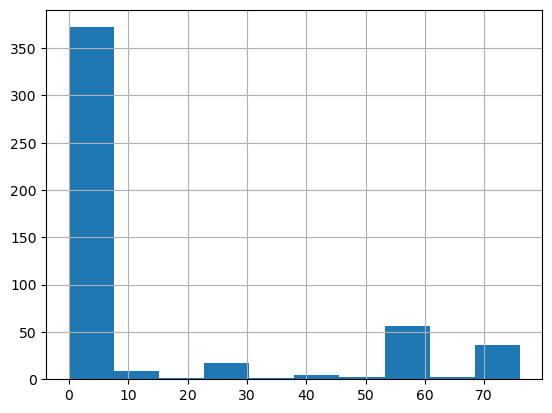

In [43]:
loan['past_due_days'].hist()

In [45]:
loan.loc[(loan['loan_status']=='PAIDOFF')&(loan['past_due_days'].isna()),'past_due_days']=0
loan['past_due_days'].fillna(-1,inplace=True)

C:\Users\GCE-PMNA\AppData\Local\Temp\ipykernel_5384\1766676484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan['past_due_days'].fillna(-1,inplace=True)


In [47]:
loan.isna().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

## groupby

In [50]:
grouped =loan.groupby('education')[['Principal',"terms","past_due_days","age"]].mean()
grouped

,Principal,terms,past_due_days,age
education,,,,
Bechalor,944.776119,21.462687,13.074627,32.134328
High School or Below,951.196172,23.631579,16.224880,31.377990
Master or Above,600.000000,11.000000,18.500000,40.250000
college,941.363636,22.686364,13.004545,30.390909


Bachelor and College education levels are associated with higher loan principals and relatively shorter past due days.

Master or Above education level shows a significantly lower principal amount but has the highest past due days, indicating that higher education may correlate with longer delays in payment despite lower loan amounts.

Age is generally higher for those with more advanced education (Master or Above), reflecting the age distribution across education levels.

# Data  Visualization

#### univariate

## histplot



To find how loan amounts are distributed

<Axes: xlabel='Principal', ylabel='Count'>

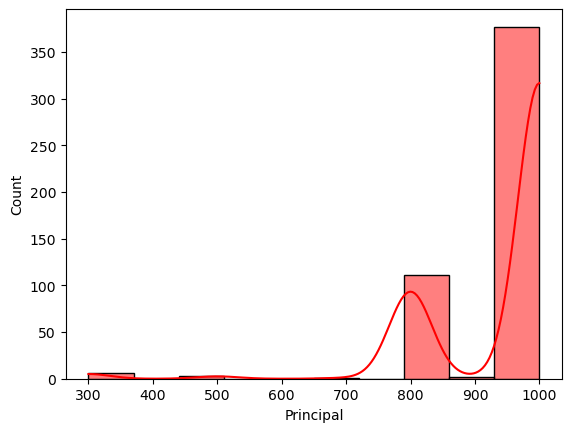

In [57]:
sns.histplot(loan["Principal"],kde=True,color="red")

Most of the people choose their principal amount bitween 800-1000

# bivariate

## boxplot

to find trends in late payments

<Axes: xlabel='loan_status', ylabel='past_due_days'>

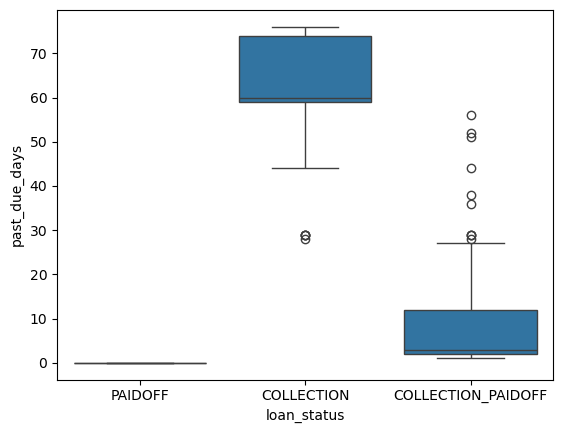

In [63]:
sns.boxplot(x="loan_status",y="past_due_days",data=loan)

The box plot shows that:

PAIDOFF loans have a wide range of overdue days, with some extreme outliers.
COLLECTION loans have a higher median of overdue days and more variability.
COLLECTION_PAIDOFF loans have a lower median and less variability in overdue days.

## multivariate

### heatmap

To check the columns are corr related or not

<Axes: >

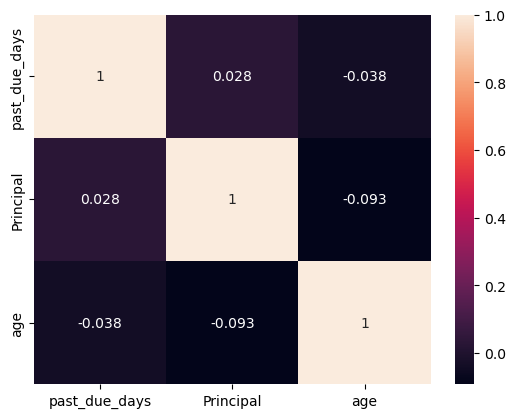

In [69]:
sns.heatmap(loan[["past_due_days","Principal","age"]].corr(),annot=True)

# outlier direction

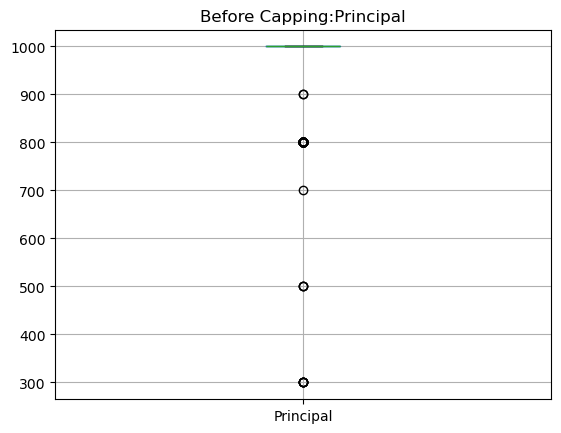

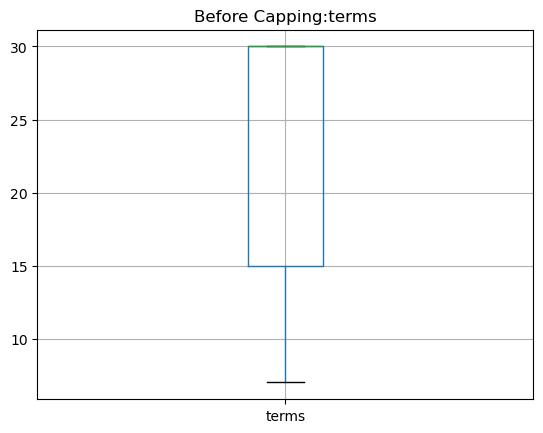

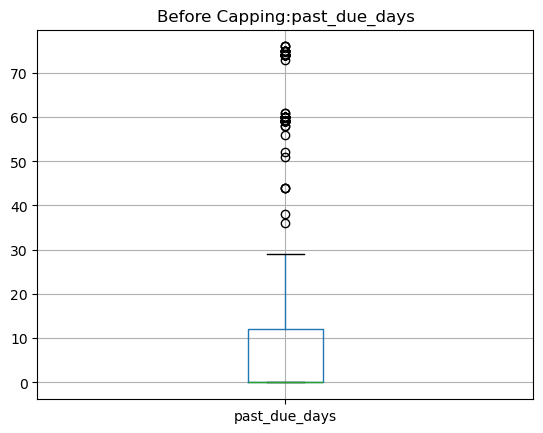

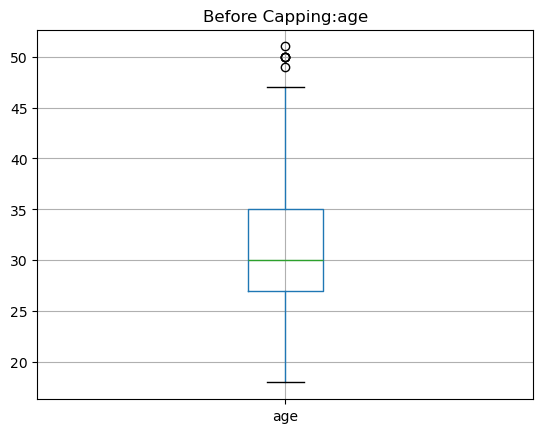

In [71]:
num_cols=['Principal',"terms","past_due_days","age"]

for col in num_cols:
    loan.boxplot(column=[col])
    plt.title(f"Before Capping:{col}")
    plt.show()

## Clipping

In [74]:
for col in num_cols:
    Q1=loan[col].quantile(0.25)
    Q3=loan[col].quantile(0.75)
    IQR=Q3-Q1

    lower_cap=Q1-1.5*IQR
    upper_cap=Q3+1.5*IQR

    loan[col]=loan[col].clip(lower_cap,upper_cap)

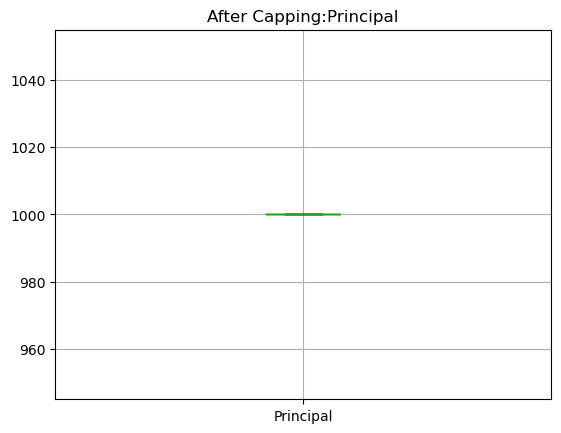

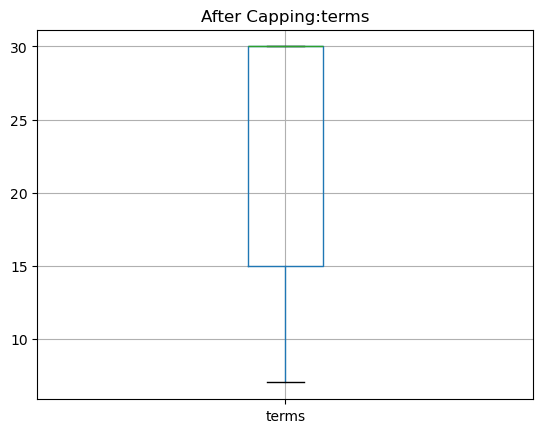

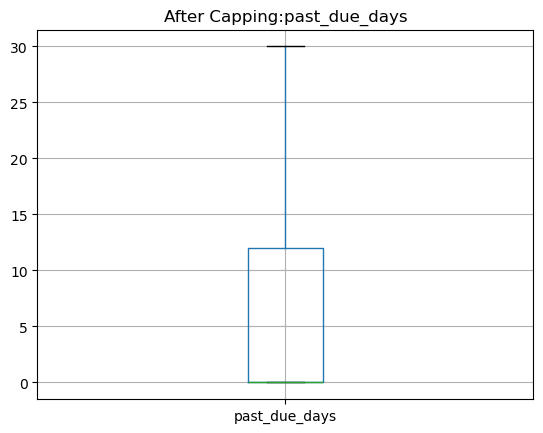

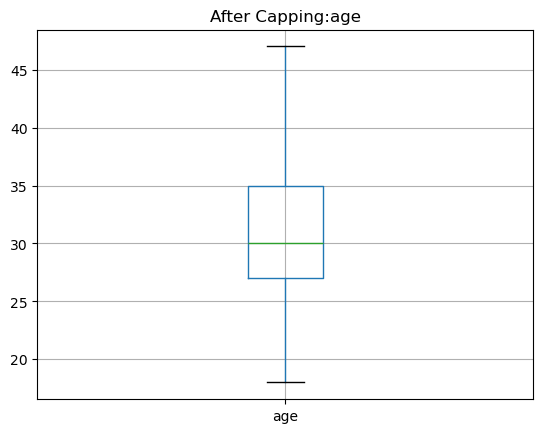

In [75]:
for col in num_cols:
    loan.boxplot(column=[col])
    plt.title(f"After Capping:{col}")
    plt.show()

## Univariate

### Distribution plot

To find which age category take more loan

C:\Users\GCE-PMNA\AppData\Local\Temp\ipykernel_5384\701785171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan['age'],kde=True,bins=10)


<Axes: xlabel='age', ylabel='Density'>

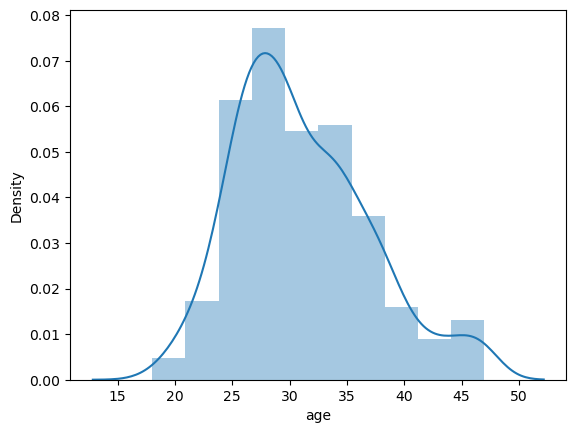

In [79]:
sns.distplot(loan['age'],kde=True,bins=10)

In between age 25-30 are take more loan  

## count plot

To find how many loans were paid off vs not pais off

<Axes: xlabel='loan_status', ylabel='count'>

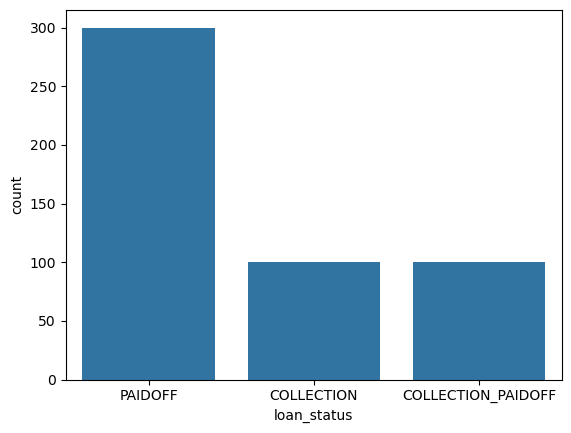

In [85]:
sns.countplot(x="loan_status",data=loan)

Most of the loans are PAIDOFF

### countplot

To check if education level affect loan repyment

<Axes: xlabel='education', ylabel='count'>

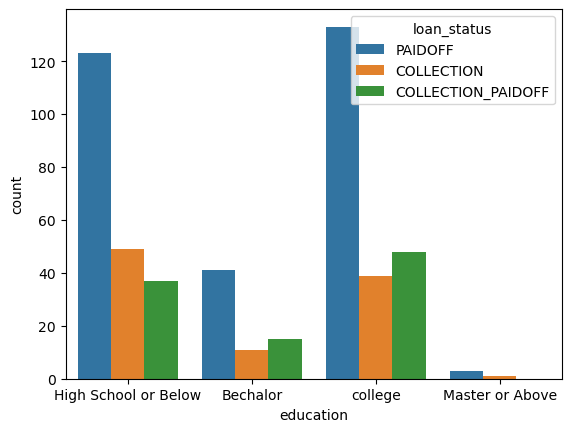

In [90]:
sns.countplot(x="education",hue="loan_status",data=loan)

costomer with higher education (college and above) tend to repay their loans more successfully then those with only high school education or below

## countplot

to check gender impacts repayment performens

<Axes: xlabel='Gender', ylabel='count'>

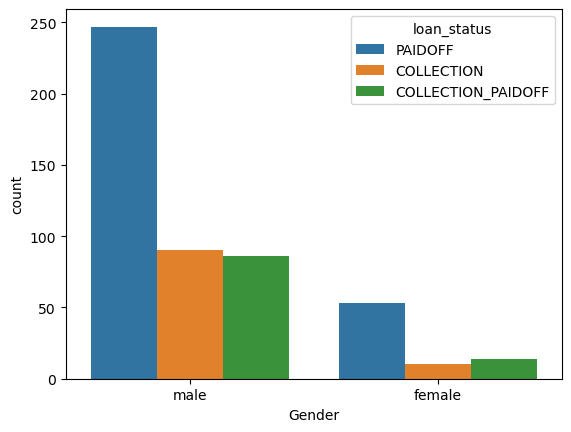

In [95]:
sns.countplot(x="Gender",hue="loan_status",data=loan)

both males and females mostly repaid their loans,but males have a higher number of borrower overall,
gender appears to have some impact,with females performing slightly better in loan repayment, though males dominate in total loan count.

## boxplot

to check if shorter or longer loan terms have different payoff rates 

<Axes: xlabel='loan_status', ylabel='terms'>

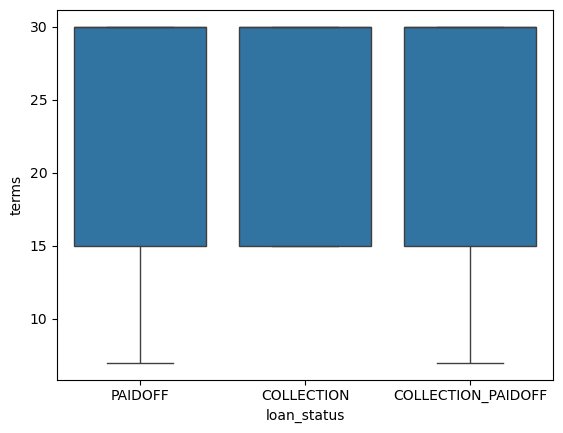

In [100]:
sns.boxplot(x="loan_status",y="terms",data=loan)

The median tern length apperars to be around 20-25 for all categories,with similer interquartile ranges and minimal outliers.

# violinplot

To see the age trend among those who paid vs defaulted.

<Axes: xlabel='loan_status', ylabel='age'>

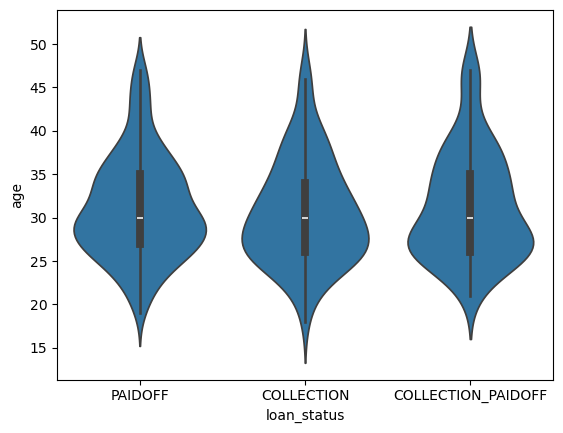

In [105]:
sns.violinplot(x="loan_status",y="age",data=loan)

The median age is around 30-35 for all categories,with a similar spread and density of ages.
this suggests that age dose not vary significantly between those who paid off their loan and those who defaulted or partially paid

# countplot

To visualize time patterns in loan repayments

<Axes: xlabel='effective_date', ylabel='count'>

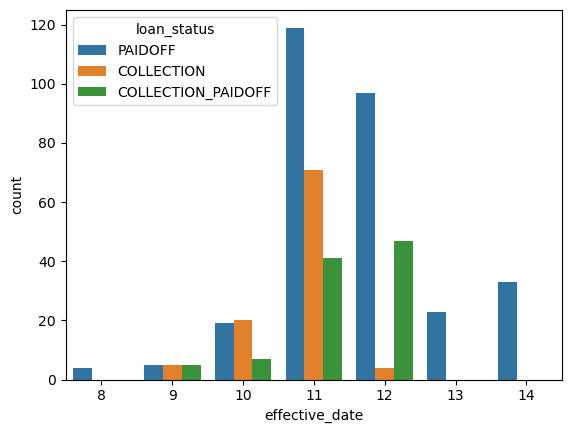

In [110]:
loan["effective_date"]=pd.to_datetime(loan["effective_date"])
sns.countplot(x=loan["effective_date"].dt.day,hue="loan_status",data=loan)

There appears to be a significant spike in the number of paid-off loans around the 11th effective date, while collections are more concentrated around the 10th and 11th dates.

<Axes: ylabel='loan_status'>

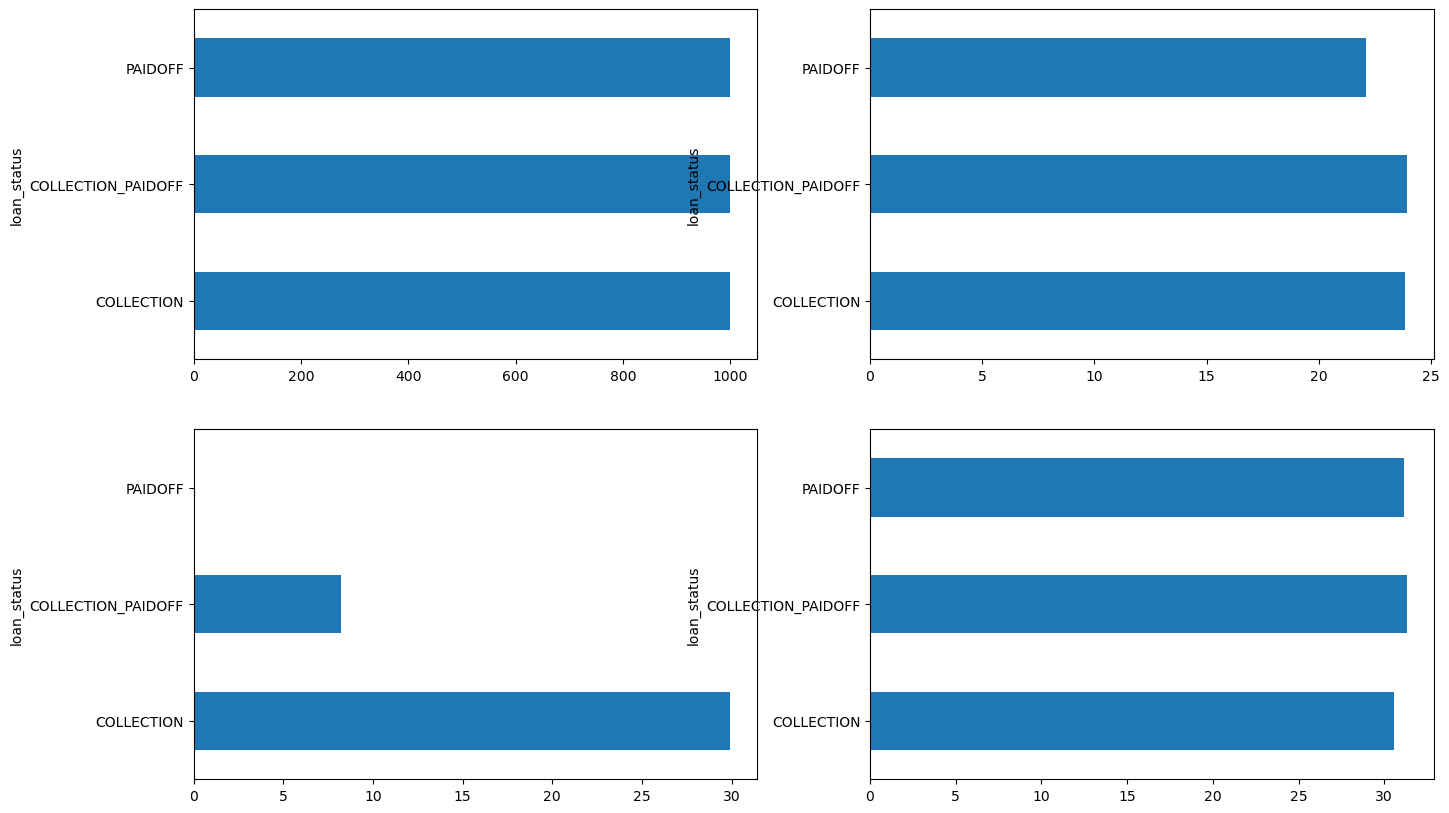

In [112]:
igbi, axesbi = plt.subplots(2,2, figsize=(16, 10))
loan.groupby('loan_status')['Principal'].mean().plot(kind='barh',ax=axesbi[0,0])
loan.groupby('loan_status')['terms'].mean().plot(kind='barh',ax=axesbi[0,1])
loan.groupby('loan_status')['past_due_days'].mean().plot(kind='barh',ax=axesbi[1,0])
loan.groupby('loan_status')['age'].mean().plot(kind='barh',ax=axesbi[1,1])

Top-left chart (Red bars): Shows significantly higher counts (~950–1000) for all three loan statuses.

Top-right chart (Yellow bars): All loan statuses have very low counts (~24).

Bottom-left chart (Orange bars): "COLLECTION" dominates with the highest count (~60), while "COLLECTION_PAIDOFF" is much lower (~10) and "PAIDOFF" is nearly zero.

Bottom-right chart (Cyan bars): All three loan statuses have almost equal and moderate counts (~30 each).